# DATASET과 DATALOADER 


In [1]:
import torch 
from torch.utils.data import Dataset 
from torchvision import datasets
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt

## 데이터셋 불러오기
- TorchVision Fashion-MNIST 데이터셋을 불러오는 예제
- Fashion-MNIST는 흑백의 28x28 이미지와 10개의 class 중 하나의 label로 구성 
- datasets.FashionMNIST(
-   매개변수 
-   root = 학습/테스트 데이터가 저장되는 경로
-   train = 학습용 또는 테스트용 데이터셋 여부를 지정 True / False
-   download = True 시 root 에 데이터가 없는 경우 인터넷에서 다운 
-   transform, target_transform은 feature과 label, transform을 지정
)

In [2]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download  = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data", 
    train = False,
    download = True,
    transform = ToTensor()
)

c:\Users\user\Desktop\Git\Pytorch_tutorial\venv\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# 데이터셋을 반복하고 시각화 하기
## Dataset에 list 처럼 직접 접근 할 수 있습니다. 

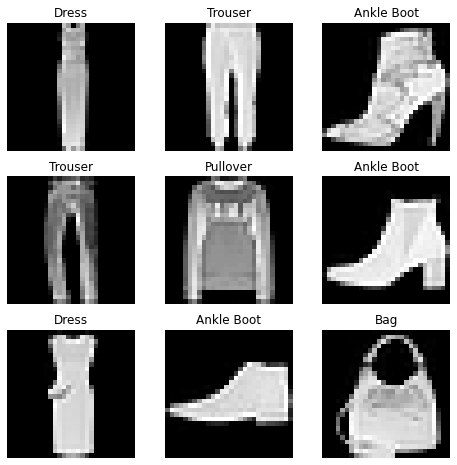

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8,8))

for i in range(1, 10): 
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(3, 3, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")

plt.show()


# 파일에서 사용자 정의 데이터셋 만들기 
## 사용자 정의 Dataset 클래스는 !반드시! 3개 함수를 구현해야합니다.
## ____init__ __ 
## ____len__ __
## ____getitem__ __
## FashionMNIST 이미지들은 img_dir 디렉토리에 저장되며 
## label은 annotations_file csv 파일에 별도로 저장

In [4]:
import os 
import pandas as pd 
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # __init__ 함수는 Data 객체가 instantiate 될 때 한번 실행 
    # 여기서는 annotations_file이 포함된 디렉토리와 두가지 변형에 대해 초기화 한다.
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None ):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir 
        self.transform = transform 
        self.target_transform = target_transform 

    # __len__ 함수는 데이터셋의 샘플 개수를 반환 
    def __len__(self):
        return len(self.img_labels)

    # __getitem__ 함수는 주어진 idx에 해당하는 샘플을 데이터셋에서 불러와서 반환 
    # idx를 기반으로 이미지의 위치를 식별하고 read_image를 사용하여 이미지를 텐서로 변환 
    # self.img_labels의 csv 데이터로부터 해당하는 label을 가져오고 해당하면 transform 함수를 호출한 뒤
    # 텐서 이미지와 label을 dict 형으로 반환 
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        if self.target_transform :
            label = self.target_transform(label)

        return image, label

# DataLoader로 학습용 데이터 준비하기 
Dataset은 데이터셋의 feature을 가져오고 하나의 샘플에 label을 지정하는 일을 한 번에 한다
모델을 학습 할 때 minibatch로 전달하고 epoch 마다 데이터를 다시 섞어서 overfit을 막고 
python의 multiprocessing을 사용하여 데이터 검색 속도를 높이려고한다.

In [6]:
# DataLoader으 간단한 API로 이러한 복잡한 과정들을 추상화한 반복 가능한 ITERATABLE이다
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

# DataLoader를 통해 반복하기 
DataLoader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 반복(iterate) 할 수 있다. 
아래의 각 반복(iteration)은 
각각 (batch_size = 64의 feature과 label을 포함하는) train_features와 train_labels의 batch로 반환한다. 
shuffle을 True로 했기때문에 배치를 반복한 뒤 데이터가 섞임 

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


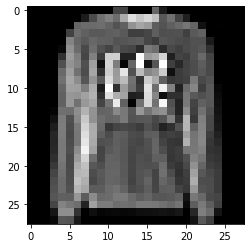

Label : 2


In [10]:
# 이미지와 label을 표시하는 것 
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label : {label}")
